In [35]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from operator import add
import seaborn as sns

In [36]:
boei_data= pd.read_csv("./bo_ei", delimiter="\t", dtype=np.float32)
bolcb_data= pd.read_csv("./bo_lcb", delimiter="\t", dtype=np.float32)

ga_data= pd.read_csv("./ga.csv", delimiter=",",names=list('abntY'), header=None)
lhcminimax_data= pd.read_csv("./lhc_minimax.csv", delimiter=",",names=list('abcdntVY'), header=None)

vmc_data= pd.read_csv("./vmc.csv", delimiter=",",names=list('abcdntVY'), header=None)
nm_data= pd.read_csv("./nm.csv", delimiter=",",names=list('abcdntVY'), header=None)

In [37]:
print(boei_data.shape)
print(bolcb_data.shape)
print(ga_data.shape)
print(lhcminimax_data.shape)
print(vmc_data.shape)
print(nm_data.shape)

(105, 6)
(110, 6)
(100, 5)
(100, 8)
(100, 8)
(100, 8)


In [38]:
display(nm_data)

,a,b,c,d,n,t,V,Y
0,489.691925,318.089569,522.218506,191.0,3.793535,9.062001,23205.744141,6.589593
1,193.960205,927.513306,208.526505,191.0,1.555713,32.195675,32320.628906,7.617358
2,401.806519,564.309082,363.884369,191.0,1.378196,1.897222,27199.865234,6.122611
3,99.996582,929.968323,300.035065,191.0,4.446758,36.910988,31644.859375,8.674968
4,464.739288,613.980530,251.280151,191.0,1.035198,38.665085,28601.339844,6.585537
...,...,...,...,...,...,...,...,...
95,388.680908,496.102356,445.216766,191.0,1.000971,4.894265,25837.923828,5.754563
96,388.736206,496.136078,445.127716,191.0,1.000845,4.943776,25838.972656,5.764100
97,388.698975,496.078796,445.222229,191.0,1.000743,4.890343,25837.626953,5.753954
98,388.939819,496.025330,445.034851,191.0,1.000121,4.846262,25838.486328,5.773554


In [39]:
#define values
values = [1100, 2200]

#drop rows that contain any value in the list
boei_data = boei_data[boei_data.Y.isin(values) == False]
bolcb_data = bolcb_data[bolcb_data.Y.isin(values) == False]

ga_data = ga_data[ga_data.Y.isin(values) == False]
lhcminimax_data = lhcminimax_data[lhcminimax_data.Y.isin(values) == False]

vmc_data = vmc_data[vmc_data.Y.isin(values) == False]
nm_data = nm_data[nm_data.Y.isin(values) == False]

In [40]:
print(boei_data.shape)
print(bolcb_data.shape)
print(ga_data.shape)
print(lhcminimax_data.shape)
print(vmc_data.shape)
print(nm_data.shape)

(100, 6)
(106, 6)
(100, 5)
(95, 8)
(94, 8)
(99, 8)


In [41]:
boei_data=boei_data.head(94)
bolcb_data=bolcb_data.head(94)
ga_data=ga_data.head(94)
lhcminimax_data=lhcminimax_data.head(94)
vmc_data=vmc_data.head(94)
nm_data=nm_data.head(94)
#boei_data.describe()

In [42]:
print(boei_data.shape)
print(bolcb_data.shape)
print(ga_data.shape)
print(lhcminimax_data.shape)
print(vmc_data.shape)
print(nm_data.shape)

(94, 6)
(94, 6)
(94, 5)
(94, 8)
(94, 8)
(94, 8)


In [43]:
boei_data['min']=boei_data.Y.expanding(1).min()
bolcb_data['min']=bolcb_data.Y.expanding(1).min()

ga_data['min'] = ga_data.Y.expanding(1).min()
lhcminimax_data['min'] = lhcminimax_data.Y.expanding(1).min()


vmc_data['min'] = vmc_data.Y.expanding(1).min()
nm_data['min'] = nm_data.Y.expanding(1).min()

In [44]:
print(nm_data)

             a           b           c      d         n          t  \
0   489.691925  318.089569  522.218506  191.0  3.793535   9.062001   
1   193.960205  927.513306  208.526505  191.0  1.555713  32.195675   
2   401.806519  564.309082  363.884369  191.0  1.378196   1.897222   
3    99.996582  929.968323  300.035065  191.0  4.446758  36.910988   
4   464.739288  613.980530  251.280151  191.0  1.035198  38.665085   
..         ...         ...         ...    ...       ...        ...   
90  388.456848  496.173126  445.370026  191.0  1.001613   4.966928   
91  388.786255  496.032684  445.181061  191.0  1.000302   4.831145   
92  388.557495  496.143829  445.298706  191.0  1.001209   4.947131   
93  388.755371  496.101257  445.143372  191.0  1.000947   4.914437   
94  388.771271  496.074493  445.154236  191.0  1.000316   4.926936   

               V         Y       min  
0   23205.744141  6.589593  6.589593  
1   32320.628906  7.617358  6.589593  
2   27199.865234  6.122611  6.122611  
3  

In [45]:
index=np.arange(1,(94+1),dtype=int)
index

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
       52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68,
       69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85,
       86, 87, 88, 89, 90, 91, 92, 93, 94])

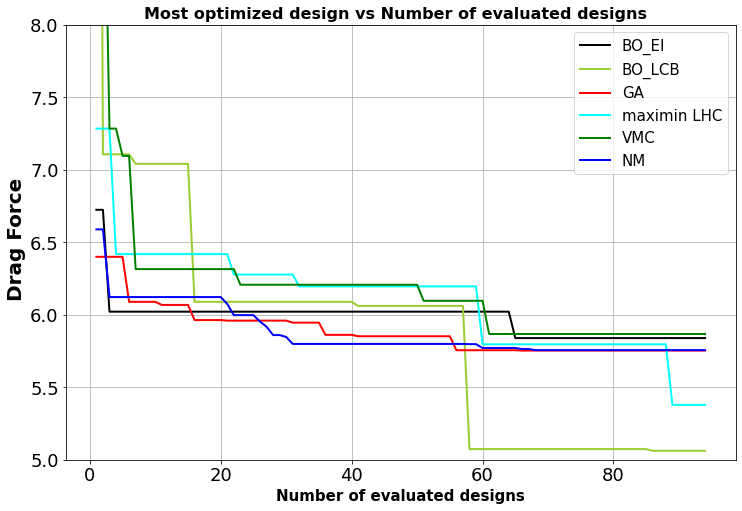

In [47]:
fig,ax=plt.subplots(figsize=(12,8))

plt.plot(index,boei_data['min'],c='black',label='BO_EI',linewidth=2.0)
plt.plot(index,bolcb_data['min'],c='yellowgreen',label='BO_LCB',linewidth=2.0)
plt.plot(index,ga_data['min'],c='red',label='GA',linewidth=2.0)
plt.plot(index,lhcminimax_data['min'],c='cyan',label='maximin LHC',linewidth=2.0)
plt.plot(index,vmc_data['min'],c='green',label='VMC',linewidth=2.0)
plt.plot(index,nm_data['min'],c='blue',label='NM',linewidth=2.0)

plt.legend(loc='best',fontsize=15)
#plt.legend(loc="lower center", ncol=4,fontsize=15)

ax.tick_params(axis='both', which='major', labelsize=18)
plt.title('Most optimized design vs Number of evaluated designs  ',fontsize=16, weight='bold')
#plt.hlines(max_uni,0,110,linestyles= 'dashed')
#plt.hlines(max_uni,6,25,linestyles= 'dashed')
#plt.vlines(6,0,max_uni,linestyles= 'dashed')
#plt.vlines(5.5,0,max_lhc,linestyles= 'dashed')
#plt.xticks(np.arange(0, 25+1, 1.0))
#plt.xlim(0,26)
#plt.ylim(0,85)
#plt.xticks(np.arange(0, 94, 1))
#plt.yticks(np.arange(0,10.0,0.1))
#plt.xlim(0,26)
plt.ylim(5,8)
plt.xlabel('Number of evaluated designs',fontsize=15,weight='bold')
plt.ylabel(' Drag Force',fontsize=20,weight='bold')
plt.grid()
plt.show()
#fig.savefig('../fig/comparison_result1.png')